In [10]:
!pip install keras


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/d7/3f/41f868253756f696fd00771885be60cf680352a818f08dda6e0ed8c96eea/tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cach

In [4]:
!pip install np_utils


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
import np_utils
from keras.preprocessing.image import  img_to_array
import os
import numpy as np
import tensorflow as tf
from PIL import Image

2023-11-22 04:25:29.611438: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 04:25:29.666088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 04:25:29.666147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 04:25:29.667715: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 04:25:29.675370: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-22 04:25:29.676495: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [6]:
x=[]
m,n = 50,50
model = tf.keras.models.load_model("models/model_latest.h5")

In [7]:
x=[]

im = Image.open('test/test.jpg')
imrs = im.resize((m,n))
imrs=img_to_array(imrs)/255;
imrs=imrs.transpose(2,0,1);
imrs=imrs.reshape(3,m,n);
x.append(imrs)
x=np.array(x);

In [8]:
predictions = model.predict(x)
print (predictions)
print (model.summary())

1/1 [==============================] - 0s 194ms/step
[[1.6268353e-04 6.3775820e-01 3.6207917e-01]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 3, 50, 128)        57728     
                                                                 
 activation_1 (Activation)   (None, 3, 50, 128)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 50, 64)         73792     
                                                                 
 activation_2 (Activation)   (None, 3, 50, 64)         0         
                                                                 
 dropout_1 (Dropout)         (None, 3, 50, 64)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 50, 32)         18464     
                     

In [9]:
predictions

array([[1.6268353e-04, 6.3775820e-01, 3.6207917e-01]], dtype=float32)

In [10]:
x =[predictions[0][0], predictions[0][1], predictions[0][2]]
y = ['knife','long gun','short gun']

In [13]:
im = Image.open(r'./test/test.jpg')  
   
im.show()

display-im6.q16: unable to open X server `' @ error/display.c/DisplayImageCommand/412.


<BarContainer object of 3 artists>

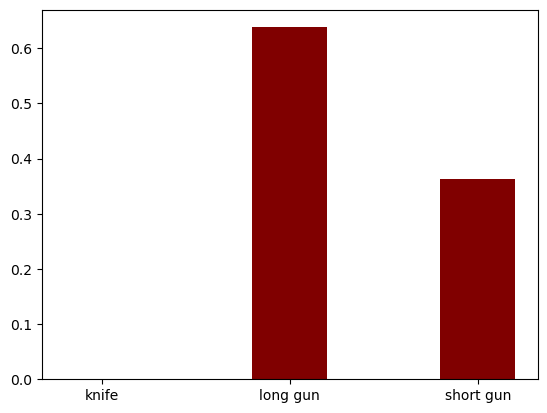

In [11]:
import matplotlib.pyplot as plt

plt.bar(y,x, color ='maroon', width = 0.4)